# Object detection by OpenCV library

Install OpenCV library

In [3]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


### Disblay image

In [1]:
# Python code to read image
import cv2
 
# To read image from disk, we use
# cv2.imread function, in below method,
img = cv2.imread("lemon.jpg", cv2.IMREAD_COLOR)

 
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2.imshow("image", img)
 
# To hold the window on screen, we use cv2.waitKey method
# Once it detected the close input, it will release the control
# To the next line
# First Parameter is for holding screen for specified milliseconds
# It should be positive integer. If 0 pass an parameter, then it will
# hold the screen until user close it.
cv2.waitKey(0)
 
# It is for removing/deleting created GUI window from screen
# and memory
cv2.destroyAllWindows()


 To convert BGR to RGB, we us a function:

In [2]:
import cv2

img = cv2.imread("lemon.jpg")
RGB_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2.imshow("image", RGB_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


### Color detection real-time

In [3]:
import cv2
import numpy as np
from PIL import Image

# Read the image
frame = cv2.imread("lemon2.jpg")
frame = cv2.resize(frame, (1200,800))

# Check if the image is loaded correctly
if frame is None:
    print("Error loading image. Check the file path.")
else:
    # Convert BGR to HSV
    hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define color range for detecting yellow (you may need to fine-tune this)
    lowerLimit = np.array([0, 200, 200], np.uint8)  # Lower bound for yellow
    upperLimit = np.array([40, 255, 255], np.uint8)  # Upper bound for yellow

    # Create a mask using the defined yellow range
    mask = cv2.inRange(hsvImage, lowerLimit, upperLimit)

    # Convert the mask to PIL format for the getbbox() function
    mask_ = Image.fromarray(mask)

    # Get bounding box of the non-zero region in the mask
    bbox = mask_.getbbox()

    if bbox is not None:
        x1, y1, x2, y2 = bbox
        # Draw a rectangle around the detected area
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

    else:
        print("No yellow color detected within the specified range.")

    # Display the image with the bounding box
    cv2.imshow("Detected Frame", frame)

    # Wait for a key press and close the window

    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [7]:
import numpy as np
import cv2


def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit


yellow = [0, 255, 255]  # yellow in BGR colorspace
get_limits(yellow)

(array([ 20, 100, 100], dtype=uint8), array([ 40, 255, 255], dtype=uint8))

In [4]:
# Python code for Multiple Color Detection 


import numpy as np 
import cv2 


# Capturing video through webcam 
webcam = cv2.VideoCapture(1) 

# Start a while loop 
while(1): 
	
	# Reading the video from the 
	# webcam in image frames 
	_, imageFrame = webcam.read() 

	# Convert the imageFrame in 
	# BGR(RGB color space) to 
	# HSV(hue-saturation-value) 
	# color space 
	hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 

	# Set range for red color and 
	# define mask 
	red_lower = np.array([136, 87, 111], np.uint8) 
	red_upper = np.array([180, 255, 255], np.uint8) 
	red_mask = cv2.inRange(hsvFrame, red_lower, red_upper) 

	# Set range for green color and 
	# define mask 
	green_lower = np.array([25, 52, 72], np.uint8) 
	green_upper = np.array([102, 255, 255], np.uint8) 
	green_mask = cv2.inRange(hsvFrame, green_lower, green_upper) 

	# Set range for blue color and 
	# define mask 
	blue_lower = np.array([94, 80, 2], np.uint8) 
	blue_upper = np.array([120, 255, 255], np.uint8) 
	blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper) 
	
	# Morphological Transform, Dilation 
	# for each color and bitwise_and operator 
	# between imageFrame and mask determines 
	# to detect only that particular color 
	kernel = np.ones((5, 5), "uint8") 
	
	# For red color 
	red_mask = cv2.dilate(red_mask, kernel) 
	res_red = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = red_mask) 
	
	# For green color 
	green_mask = cv2.dilate(green_mask, kernel) 
	res_green = cv2.bitwise_and(imageFrame, imageFrame, 
								mask = green_mask) 
	
	# For blue color 
	blue_mask = cv2.dilate(blue_mask, kernel) 
	res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
							mask = blue_mask) 

	# Creating contour to track red color 
	contours, hierarchy = cv2.findContours(red_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 0, 255), 2) 
			
			cv2.putText(imageFrame, "Red Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 1.0, 
						(0, 0, 255))	 

	# Creating contour to track green color 
	contours, hierarchy = cv2.findContours(green_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(0, 255, 0), 2) 
			
			cv2.putText(imageFrame, "Green Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (0, 255, 0)) 

	# Creating contour to track blue color 
	contours, hierarchy = cv2.findContours(blue_mask, 
										cv2.RETR_TREE, 
										cv2.CHAIN_APPROX_SIMPLE) 
	for pic, contour in enumerate(contours): 
		area = cv2.contourArea(contour) 
		if(area > 300): 
			x, y, w, h = cv2.boundingRect(contour) 
			imageFrame = cv2.rectangle(imageFrame, (x, y), 
									(x + w, y + h), 
									(255, 0, 0), 2) 
			
			cv2.putText(imageFrame, "Blue Colour", (x, y), 
						cv2.FONT_HERSHEY_SIMPLEX, 
						1.0, (255, 0, 0)) 
			
	# Program Termination 
	cv2.imshow("Multiple Color Detection in Real-TIme", imageFrame) 
	if cv2.waitKey(10) & 0xFF == ord('q'): 
		webcam.release() 
		cv2.destroyAllWindows() 
		break


### Face detection

Haar Cascade classifiers are an effective way for object detection. This method was proposed by Paul Viola and Michael Jones in their paper Rapid Object Detection using a Boosted Cascade of Simple Features. Haar Cascade is a machine learning-based approach where a lot of positive and negative images are used to train the classifier.

XML classifiers https://github.com/Itseez/opencv/blob/master/data/haarcascades

In [5]:
# Import OpenCV library
import cv2

# load the required trained XML classifiers 
# https://github.com/Itseez/opencv/blob/master/data/haarcascades
# Trained XML classifiers describes some features of some 
# object we want to detect a cascade function is trained 
# from a lot of positive(faces) and negative(non-faces) 
# images. 

# Load a cascade file for detecting faces
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# Load image
image = cv2.imread("faces.jpg")

# Convert into grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Look for faces in the image using the loaded cascade file
faces = faceCascade.detectMultiScale(gray, 1.2, 5)
for (x,y,w,h) in faces:
        # Create rectangle around faces
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)

# Create the resizeable window
cv2.namedWindow('faces', cv2.WINDOW_NORMAL)

# Display the image
cv2.imshow('faces', image)

# Wait until we get a key
k=cv2.waitKey(0)

# If pressed key is ESC
if k == 27:
    # Destroy all windows
    cv2.destroyAllWindows()


### Real-time face detection by webcam

In [6]:
import cv2

# load the required trained XML classifiers 
# https://github.com/Itseez/opencv/blob/master/data/haarcascades
# Trained XML classifiers describes some features of some 
# object we want to detect a cascade function is trained 
# from a lot of positive(faces) and negative(non-faces) 
# images. 

# Load a cascade file for detecting faces
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

#access our device’s camera to read a live stream of video data
video_capture = cv2.VideoCapture(1)

# Continuasly looking for faces in the image using the loaded cascade file
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        video_capture.release() 
        cv2.destroyAllWindows() 
        break


  

### Car detection 

In [7]:
import cv2
import time
import numpy as np

# Create our body classifier
car_classifier = cv2.CascadeClassifier('haarcascade_car.xml')

# Initiate video capture for video file
cap = cv2.VideoCapture('Cars.mp4')

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Loop once video is successfully loaded
while cap.isOpened():
    time.sleep(0.05)
    
    # Read first frame
    ret, frame = cap.read()
    
    # If frame is read correctly, ret will be True
    if not ret:
        print("Error: Could not read frame.")
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Pass frame to our car classifier
    cars = car_classifier.detectMultiScale(gray, 1.4, 2)
    
    # Extract bounding boxes for any bodies identified
    for (x, y, w, h) in cars:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
    # Show the frame with detected cars
    cv2.imshow('Cars', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close any OpenCV windows
cap.release()
cv2.destroyAllWindows()


### Real-time face recognition
Steps:
1. collect dataset
2. train model
3. test model

https://github.com/medsriha/real-time-face-recognition/tree/master

### Stop sign detection

https://github.com/maurehur/Stop-Sign-detection_OpenCV

### Object Tracking

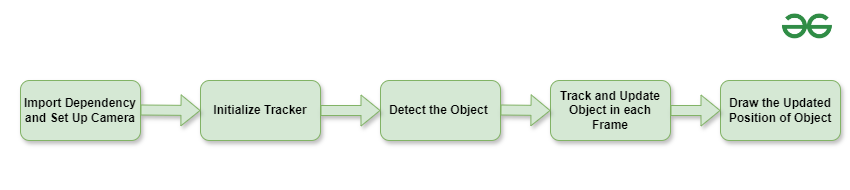

In [15]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(1)

ret, frame = cap.read()
bbox = cv.selectROI('select', frame, False)

x, y, w, h = bbox

roi = frame[y:y+h, x:x+w]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)),
                  np.array((180., 255., 255.)))
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)

term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

while(1):
    ret, frame = cap.read()

    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

        ret, track_window = cv.meanShift(dst, bbox, term_crit)

        x, y, w, h = track_window
        img2 = cv.rectangle(frame, (x, y), (x+w, y+h), 255, 2)
        cv.imshow('gfg', img2)

        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cap.release()
cv.destroyAllWindows()


### Other Projects

https://github.com/rchavezj/OpenCV_Projects?tab=readme-ov-file#Object-Detection-Part-1-Intro